# Analysing the Impact of External Factors on Ride Sharing Service

# Contents <a id='back'></a>
* [1. Introduction](#intro)
* [2. Data Exploration](#data_exploration)
* [3. Data Preprocessing](#data_preprocessing)
* [4. Exploratory Data Analysis (EDA)](#eda)
    * [Distribution of Trips on 15-16 November by Company](#company_trip)
    * [Top 10 Companies in Chicago Ride Sharing Service](#top_10_company)
    * [Distribution of Daily Trips by Neighbourhood](#neighbourhood_trip)
    * [Top 10 Visited Neighbourhoods in Chicago with Ride Sharing Service ](#top_10_neighbourhood)
    * [Number of Trips from Loop to O'hare International Airport on Saturday](#saturday_trip)
    * [Average Time Duration from Loop to O'hare International Airport per Weather Condition ](#weather_trip)
* [5. Hypothesis Testing](#hypothesis_testing)
* [6. General Conclusion](#general_conclusion)

## 1. Introduction <a id='intro'></a>

This project is to perform an analysis for a new ride-sharing company which is launching in Chicago. By using available online information and database, relevant analyses will be conducted to understand the passenger preferences and the impact of external factors on rides.

### Purpose

This project aims to answer the following quesions:
1. Which company is the current leader in the ride-sharing service?
2. Which location in Chicago is the most popular destination for ride-sharing services?
3. Does weather condition have impact on ride-sharing service usage?

### Hypothesis

One hypothesis is formulated to test the impact of weather on ride-sharing servive:
1. The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

## 2. Data Exploration <a id='data_exploration'></a>

The weather data in Chicago in November 2017 is available online, the data has been parsed and uploaded to the company's database. After that, an exploratory data analysis was performed with other information in the database. The outcomes have been exported into three separate datasets and will be used to conduct the relevant analyses and hypothesis testing in this project.

In [2]:
# Load the three datasets
try:
    company_data = pd.read_csv('moved_project_sql_result_01.csv')
    dropoff_data = pd.read_csv('moved_project_sql_result_04.csv')
    trip_data = pd.read_csv('moved_project_sql_result_07.csv')
except:
    company_data = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
    dropoff_data = pd.read_csv('/datasets/moved_project_sql_result_04.csv')
    trip_data = pd.read_csv('/datasets/moved_project_sql_result_07.csv')

**`company_data`**

In [3]:
# Have a look at the company data
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


The dataset has 64 rows (company) and 2 columns of information related to each company.

**Description of data**
- comapany_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [4]:
# Check if there is any missing value
company_data.isna().sum().sort_values(ascending = False)

company_name    0
trips_amount    0
dtype: int64

In [5]:
# Check for duplicates
company_data.duplicated().sum()

0

In [6]:
# Check the data types
company_data.dtypes

company_name    object
trips_amount     int64
dtype: object

In [7]:
# Look at the statictics of the numerical columns
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


- No missing value and duplicate, the data type is also correct.
- No obvious anomaly in the `trips_amount` column. The mean value is significantly greater than the median, which shows that the distribution of the `trips_amount` data is heavily skewed to the right.

**`dropoff_data`**

In [8]:
# Have a look at the dropoff data
dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


The dataset has 94 rows (dropoff location) and 2 columns of information related to each location.

**Description of data**
- dropoff_location_name: Chicago neighbourhoods where rides ended
- average_trips: the average number of rides that ended in each neightbourhood in November 2017.

In [9]:
# Check if there is any missing value
dropoff_data.isna().sum().sort_values(ascending = False)

dropoff_location_name    0
average_trips            0
dtype: int64

In [10]:
# Check for duplicates
dropoff_data.duplicated().sum()

0

In [11]:
# Check the data types
dropoff_data.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [12]:
# Look at the statictics of the numerical columns
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


- No missing value and duplicate, the data type is also correct.
- No obvious anomaly in the `average_trips` column. The mean value is also greater than the median, therefore the distribution of the `trips_amount` data is skewed to the right.

**`trip_data`**

In [13]:
# Have a look at the trip data
trip_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


The dataset has 1068 rows (trips) and 3 columns of information related to each trip.

**Description of data**
- start_ts: pickup date and time
- weather_conditions: weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds

In [14]:
# Check if there is any missing value
trip_data.isna().sum().sort_values(ascending = False)

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [15]:
# Check for duplicates
trip_data.duplicated().sum()

197

In [16]:
# Check the data types
trip_data.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [17]:
# Look at the statictics of the numerical columns
trip_data.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


- There is no missing values in the `trip_data`
- The data type of `start_ts` should be `datetime` and there are 197 duplicated rows.
- It is impossible to have a minimum value of `0` second time duration. We will further investigate into this issue.

**Conclusion**

From the overview of the data, the dataset are sufficient to conduct the relevant analysis and test the hypotheses. However, there are

**Issues need to be addresed later**
- Change the data type of `start_ts` to `datetime`.
- Investigate into the 197 duplicated rows and the anomalies of `0` second ride duration in `trip_data`.

[Back to Contents](#back)

## 3. Data Preprocessing <a id='data_preprocessing'></a>

---

The following function will assist in automating the works in data preprocessing and exploratory data analysis stages.

In [18]:
def sns_histplot(data, x, figsize, title, xlabel, ylabel, bins, xticks_label):
    """
    This function plots a histogram to show the distribution of a dataset
    """
    # Set up figure
    sns.set_style('whitegrid')
    plt.figure(figsize = (figsize[0], figsize[1]))    
    
    # Plot the histogram
    sns.histplot(data = data, x = x, color = 'red', bins = bins)
    
    # Set title, xlabel, ylabel, xticks
    plt.title(title, fontsize = 14, fontweight = 'bold', color = 'blue')
    plt.xlabel(xlabel, fontsize = 12, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 12, fontweight = 'bold')
    plt.xticks(xticks_label, fontweight = 'bold')
    plt.yticks(fontweight = 'bold')

    plt.show()

---

In [19]:
# Change the data type of start_ts to date time
trip_data['start_ts'] = pd.to_datetime(trip_data['start_ts'], format = '%Y-%m-%d %H:%M:%S')

# Check if the data type of start_ts is updated
trip_data.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

Next, we will have an investigation on the duplicated rows.

In [20]:
# Have a look at some of the duplicated rows
trip_data[trip_data.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [21]:
# Check the first dupliacted record
trip_data.query('start_ts == "2017-11-11 06:00:00" and duration_seconds == 1260')

,start_ts,weather_conditions,duration_seconds
43,2017-11-11 06:00:00,Good,1260.0
62,2017-11-11 06:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
250,2017-11-11 06:00:00,Good,1260.0
333,2017-11-11 06:00:00,Good,1260.0
343,2017-11-11 06:00:00,Good,1260.0
725,2017-11-11 06:00:00,Good,1260.0
948,2017-11-11 06:00:00,Good,1260.0


These 'duplicated' rows are suspected to be different trip records since the time records in `start_ts` were rounded to the nearest hour and the `duration_seconds` are divisible by 60, indicating that the durations were rounded to the nearest minute. We will keep these duplicates as we do not have enough evidence to prove that they are duplicates.

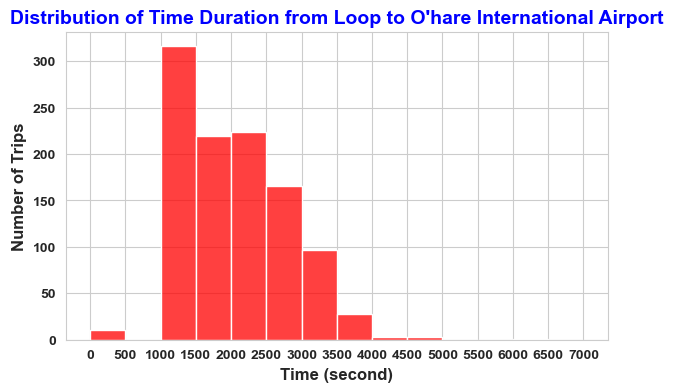

In [22]:
# Plot a histogram to show the distribution of duration_seconds
sns_histplot(data = trip_data, x = 'duration_seconds', figsize = (7,4),
             title = 'Distribution of Time Duration from Loop to O\'hare International Airport',
             xlabel = 'Time (second)', ylabel = 'Number of Trips',
             bins = [x for x in np.arange(0,7500,500)], 
             xticks_label = [x for x in np.arange(0,7500,500)])

From the histogram, the trips with travel time less than 1000 seconds obviously are anomalies. Let's check the percentages of the anomalies.

In [23]:
# Check the trips with travel time less than 1000 seconds
trip_data.query('duration_seconds < 1000')

,start_ts,weather_conditions,duration_seconds
15,2017-11-25 13:00:00,Good,60.0
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
203,2017-11-18 00:00:00,Bad,480.0
204,2017-11-18 19:00:00,Good,0.0
424,2017-11-11 13:00:00,Good,420.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
860,2017-11-04 18:00:00,Bad,480.0
1063,2017-11-25 11:00:00,Good,0.0


In [24]:
# Calculate the percentage of anomalies with low values of travel time
print('The percentage of trips with travel time less than 500 seconds:',
      f'{trip_data.query("duration_seconds < 1000").shape[0] / trip_data.shape[0]:.2%}')

The percentage of trips with travel time less than 500 seconds: 0.94%


The percentage of anomalies account about 1% of the whole dataset and they will be dropped.

In [25]:
# Drop the rows with anomalies
trip_data = trip_data.query('duration_seconds >= 1000')

# Last check on the info of the trip_data
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1058 non-null   datetime64[ns]
 1   weather_conditions  1058 non-null   object        
 2   duration_seconds    1058 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.1+ KB


[Back to Contents](#back)

## 4. Exploratory Data Analysis (EDA) <a id='eda'></a>

---

The following functions will automate the works in the exploratory data analysis stage.

In [26]:
def assign_top_groups(data, row, factor):
    """
    This function assign groups according to the descending order of a
    specific ranking factor
    """
    # Create a list to identify the ranking
    ranking_list = list(data.sort_values(factor, ascending = False)[factor])
    
    # Assign group according to the ranking list
    if row[factor] in ranking_list[0:10]:    
        return 'Top 10'
    elif row[factor] in ranking_list[10:20]:
        return 'Top 11-20'
    else:
        return 'Others'

In [27]:
def top_10_plot(data, x, y, group, figsize, suptitle, pie_title, bar_title, bar_xlabel, bar_ylabel):
    """
    This function creates a pie chart to show the percentage in each group
    and a bar chart to show the distribution in top 10 based on a factor
    """
    # Create data for the charts
    pie_data = data.groupby(group)[y].sum().sort_values()
    bar_data = data.sort_values(y, ascending = False).head(10)
    
    # Set up figure
    sns.set_style('white')
    sns.set_palette('Set2')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (figsize[0], figsize[1]))    
    
    # Plot the pie chart and the bar chart
    ax1.pie(pie_data.values, labels = pie_data.index, autopct = '%1.1f%%',
            startangle = 90, shadow = True, explode = (0, 0, 0.1))
    ax1.axis('equal')
    sns.barplot(data = bar_data, x = y, y = x, ax = ax2)
    
    # Set suptitle, titles, labels
    fig.suptitle(suptitle, fontsize = 14, fontweight = 'bold', color = 'darkblue', x = 0.66)
    ax1.set_title(pie_title, fontsize = 12, fontweight = 'bold', y = 1.04, color = 'blue')
    ax2.set_title(bar_title, fontsize = 12, fontweight = 'bold', color = 'blue')
    ax2.set_xlabel(bar_xlabel, fontweight = 'bold')
    ax2.set_ylabel(bar_ylabel, fontweight = 'bold')

    plt.tight_layout()

    plt.show()

In [28]:
def sns_barplot(data, x, y, hue, agg, figsize, title, xlabel, ylabel, xticks_label):
    """
    This function plot a bar chart to 
    compare the values in column (y) based on other columns (x)
    """
    
    # Create an aggregated data
    data = data.groupby([x, hue])[y].agg(agg).reset_index()    
    data.columns = [x, hue, agg]
    
    # Set up figure
    sns.set_style('whitegrid')
    sns.set_palette('deep')
    plt.figure(figsize = (figsize[0], figsize[1]))
    
    # Plot the bar chart
    sns.barplot(data = data, x = x, y = agg, hue = hue)
    
    # Set title, labels, ticks, legend
    plt.title(title, fontsize = 14, fontweight = 'bold', color = 'blue')
    plt.xlabel(xlabel, fontsize = 12, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 12, fontweight = 'bold')
    plt.xticks(np.arange(len(xticks_label)), labels = xticks_label, fontweight = 'bold')
    plt.yticks(fontweight = 'bold')
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

    plt.show()

---

[Back to Contents](#back)

### Distribution of Trips on 15-16 November by Company <a id='company_trip'></a>

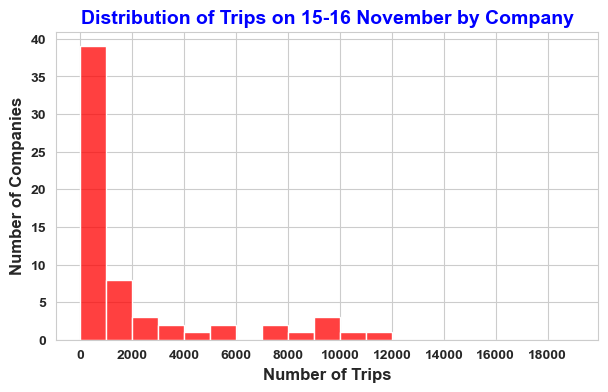

In [29]:
# Plot a histogram to show the distribution of number of trips per comapany
sns_histplot(data = company_data, x = 'trips_amount', figsize = (7,4),
             title = 'Distribution of Trips on 15-16 November by Company',
             xlabel = 'Number of Trips', ylabel = 'Number of Companies',
             bins = [x for x in np.arange(0,20000,1000)], 
             xticks_label = [x for x in np.arange(0,20000,2000)])

From the histogram, it can be seen that the distribution of trips by company indeed skewed heavily to the right. Many companies had very low trip counts and there were a few companies with trip counts of 10000 and above. Let's identify these top leaders in the Chicago ride-sharing service.

[Back to Contents](#back)

### Top 10 Companies in Chicago Ride Sharing Service <a id='top_10_company'></a>

In [30]:
# Find the top 10 companies
company_data.sort_values('trips_amount', ascending = False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


The table shows the top 10 companies with the 'Flash Cab' company be the sole leader in the market. Now, let's examine the performance of the remaining companies in the market.

In [31]:
# Apply the function to rank the companies in terms of trips amount
company_data['ranking'] = company_data.apply(
    lambda x: assign_top_groups(company_data, x, 'trips_amount'), axis = 1
)

# Check the newly added column
company_data

,company_name,trips_amount,ranking
0,Flash Cab,19558,Top 10
1,Taxi Affiliation Services,11422,Top 10
2,Medallion Leasin,10367,Top 10
3,Yellow Cab,9888,Top 10
4,Taxi Affiliation Service Yellow,9299,Top 10
...,...,...,...
59,4053 - 40193 Adwar H. Nikola,7,Others
60,2733 - 74600 Benny Jona,7,Others
61,5874 - 73628 Sergey Cab Corp.,5,Others
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3,Others


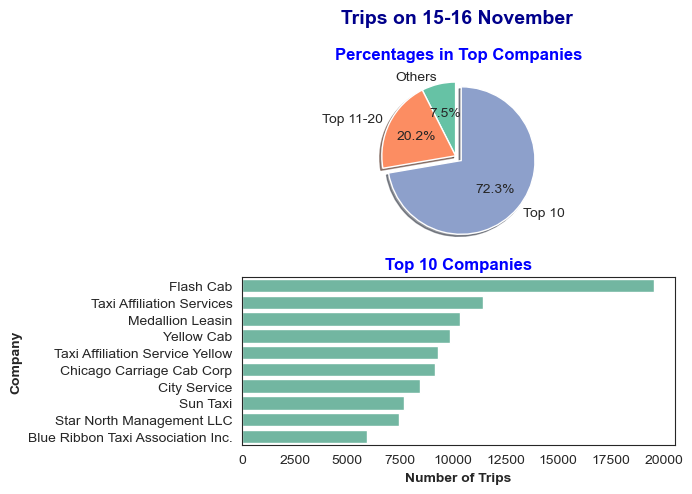

In [32]:
# Plot a pie chart and bar chart to show the distribution of trips in top companies
top_10_plot(data = company_data, x = 'company_name', y = 'trips_amount', 
            group = 'ranking', figsize = (7,5), suptitle = 'Trips on 15-16 November',
            pie_title = 'Percentages in Top Companies', bar_title = 'Top 10 Companies',
            bar_xlabel = 'Number of Trips', bar_ylabel = 'Company')

The pie chart shows that the top 10 companies account for 72.3% of the total number of trips. The rest of the companies are not matched for these top leaders.

Among the the 10 companies, the 'Flash Cab' stands out as the preferred ride-sharing service provider among passengers.

[Back to Contents](#back)

### Distribution of Daily Trips by Neighbourhood <a id='neighbourhood_trip'></a>

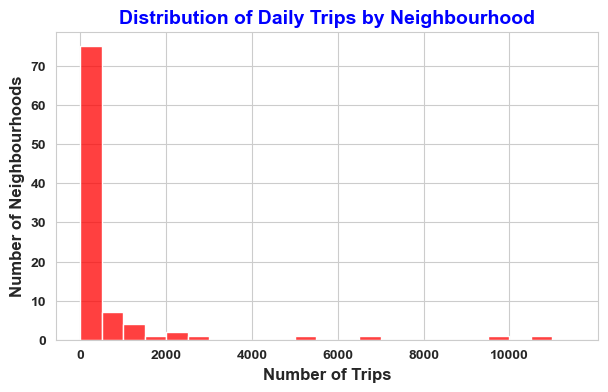

In [33]:
# Plot a histogram to show the distribution of number of trips per neighbourhood
sns_histplot(data = dropoff_data, x = 'average_trips', figsize = (7,4),
             title = 'Distribution of Daily Trips by Neighbourhood',
             xlabel = 'Number of Trips', ylabel = 'Number of Neighbourhoods',
             bins = [x for x in np.arange(0,12000,500)], 
             xticks_label = [x for x in np.arange(0,12000,2000)])

The distribution of daily trips by neighbourhood is also skewed to the right. In Novembery 2017, the majority of neighborhoods recorded a low number of daily trips, while a small number of neighbourhoods had more than 4000 trips per day.

[Back to Contents](#back)

### Top 10 Visited Neighbourhoods in Chicago with Ride Sharing Service <a id='top_10_neighbourhood'></a>

In [34]:
# Find the top 10 neighbourhoods
dropoff_data.sort_values('average_trips', ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


The table above shows the top 10 neighbourhoods in terms of daily trips. The 'Loop' and 'River North' stand out as the most visited neighbourhoods with about 10000 daily trips. Let's find out how the number of trips are distributed in other neighbourhoods.

In [35]:
# Apply the function to rank the neighbourhood in terms of average_trips
dropoff_data['ranking'] = dropoff_data.apply(
    lambda x: assign_top_groups(dropoff_data, x, 'average_trips'), axis = 1
)

# Check the newly added column
dropoff_data

,dropoff_location_name,average_trips,ranking
0,Loop,10727.466667,Top 10
1,River North,9523.666667,Top 10
2,Streeterville,6664.666667,Top 10
3,West Loop,5163.666667,Top 10
4,O'Hare,2546.900000,Top 10
...,...,...,...
89,Mount Greenwood,3.137931,Others
90,Hegewisch,3.117647,Others
91,Burnside,2.333333,Others
92,East Side,1.961538,Others


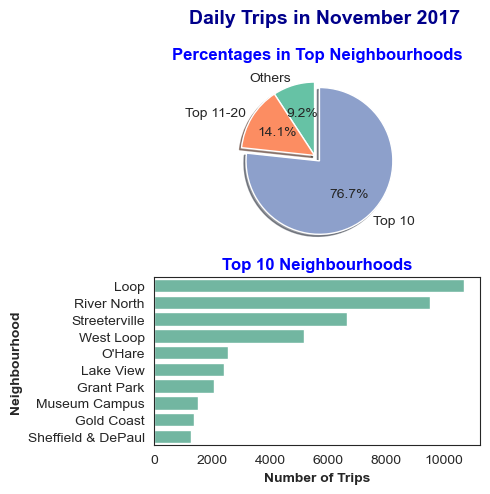

In [36]:
# Plot a pie chart and bar chart to show the distribution of trips in top neighbourhoods
top_10_plot(data = dropoff_data, x = 'dropoff_location_name', y = 'average_trips', 
            group = 'ranking', figsize = (5,5), suptitle = 'Daily Trips in November 2017',
            pie_title = 'Percentages in Top Neighbourhoods', bar_title = 'Top 10 Neighbourhoods',
            bar_xlabel = 'Number of Trips', bar_ylabel = 'Neighbourhood')

In november 2007, top 10 neighbourhoods accounted for 76.7% of daily trips, while the neighbourhoods ranking from 11th to 20th had 14.1%. The remaining 9.2% of trips were spread across the remaining 74 neighbourhoods.

Among the top 10 neighbourhoods, the daily trip counts of 'Loop', 'River North', 'Streeterville' and 'West Loop' were at least  double those of the remaining six neighbourhoods.

[Back to Contents](#back)

### Number of Trips from Loop to O'hare International Airport on Saturday <a id='saturday_trip'></a>

Before testing the hypothesis, we will explore some additional information of `duration_seconds` based on `weather_conditions`.

In [37]:
# Create a new column containing the day value of datetime
trip_data['day_of_month'] = trip_data['start_ts'].dt.day

# Have a look at the column
trip_data.head()

,start_ts,weather_conditions,duration_seconds,day_of_month
0,2017-11-25 16:00:00,Good,2410.0,25
1,2017-11-25 14:00:00,Good,1920.0,25
2,2017-11-25 12:00:00,Good,1543.0,25
3,2017-11-04 10:00:00,Good,2512.0,4
4,2017-11-11 07:00:00,Good,1440.0,11


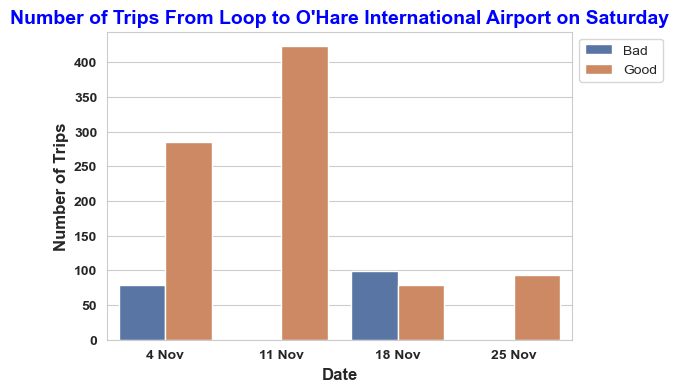

In [38]:
sns_barplot(data = trip_data, x = 'day_of_month', y = 'duration_seconds', 
            hue = 'weather_conditions', agg = 'count', figsize = (6,4),
            title = 'Number of Trips From Loop to O\'Hare International Airport on Saturday',
            xlabel = 'Date', ylabel = 'Number of Trips', 
            xticks_label = ['4 Nov', '11 Nov', '18 Nov', '25 Nov'])

The bar chart reveals that trip counts do not have a regular pattern on Saturdays. Specifically, there were more trips during the first two weekends of November 2017. 

On the other hand, on November 4, trip count was higher when the weather condition was good. However, on November 18, trip count in bad weather condition was surprisingly higher than that in good weather condition.

[Back to Contents](#back)

### Average Time Duration from Loop to O'hare International Airport per Weather Condition <a id='weather_trip'></a>

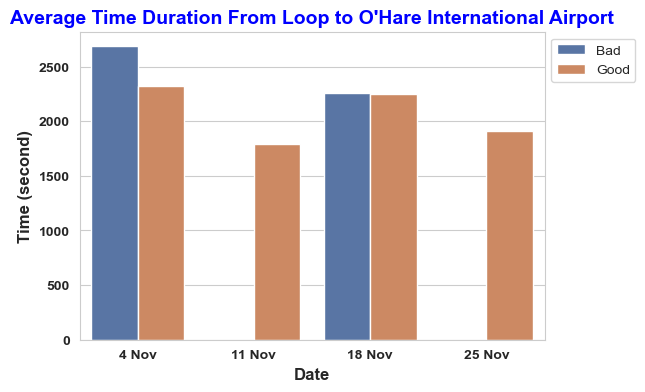

In [39]:
sns_barplot(data = trip_data, x = 'day_of_month', y = 'duration_seconds', 
            hue = 'weather_conditions', agg = 'mean', figsize = (6,4),
            title = 'Average Time Duration From Loop to O\'Hare International Airport',
            xlabel = 'Date', ylabel = 'Time (second)', 
            xticks_label = ['4 Nov', '11 Nov', '18 Nov', '25 Nov'])

From the bar chart, the average travel time is around 1800 to 2700 seconds. When comparing travel times on the 4th and 18th of November, the travel time during bad weather was slightly longer. However, on the 18th of November, the difference in travel times between good and bad weather conditions was not significant.

[Back to Contents](#back)

## 5. Hypothesis Testing <a id='hypothesis_testing'></a>

### Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [40]:
# Slice the trip data based on good and bad weather condtions
good_weather_trip = trip_data.query('weather_conditions == "Good"').reset_index(drop = True)
bad_weather_trip = trip_data.query('weather_conditions == "Bad"').reset_index(drop = True)

# Display the first three rows of each table
display(good_weather_trip.head(3))
display(bad_weather_trip.head(3))

,start_ts,weather_conditions,duration_seconds,day_of_month
0,2017-11-25 16:00:00,Good,2410.0,25
1,2017-11-25 14:00:00,Good,1920.0,25
2,2017-11-25 12:00:00,Good,1543.0,25


,start_ts,weather_conditions,duration_seconds,day_of_month
0,2017-11-04 16:00:00,Bad,2969.0,4
1,2017-11-18 12:00:00,Bad,1980.0,18
2,2017-11-04 17:00:00,Bad,2460.0,4


In [41]:
# Calculate necessary descriptive statistics
count_good = good_weather_trip['duration_seconds'].count()
mean_good = np.mean(good_weather_trip['duration_seconds'])
var_good = np.var(good_weather_trip['duration_seconds'], ddof=1)
std_good = np.std(good_weather_trip['duration_seconds'], ddof=1)
    
count_bad = bad_weather_trip['duration_seconds'].count()
mean_bad = np.mean(bad_weather_trip['duration_seconds'])
var_bad = np.var(bad_weather_trip['duration_seconds'], ddof=1)
std_bad = np.std(bad_weather_trip['duration_seconds'], ddof=1)

In [42]:
# Show the results
print('For the duration of rides in good weather condition:')
print()
print(f'Count: {count_good}')
print(f'Mean: {mean_good:.2f}')
print(f'Variance: {var_good:.4f}')
print(f'Standard Deviation: {std_good:.4f}')
print('-'*60)
print()
print('For the duration of rides in bad weather condition:')
print()
print(f'Count: {count_bad}')
print(f'Mean: {mean_bad:.2f}')
print(f'Variance: {var_bad:.4f}')
print(f'Standard Deviation: {std_bad:.4f}')
print('-'*60)
print()
print(f'Ratio of variances: {var_good /var_bad:.4f}')   

For the duration of rides in good weather condition:

Count: 880
Mean: 2017.31
Variance: 546902.4846
Standard Deviation: 739.5286
------------------------------------------------------------

For the duration of rides in bad weather condition:

Count: 178
Mean: 2449.08
Variance: 482848.6878
Standard Deviation: 694.8731
------------------------------------------------------------

Ratio of variances: 1.1327


Let the population mean of duration of rides in good weather condition be \$\mu_{1}$

Let the population mean of duration of rides in bad weather condition be \$\mu_{2}$

**Sample 1: Trips During Good Weather Condition**
- Number of observations: \$n_{1} \= 880$

- Mean of duration of rides: \$\bar{x}_{1} \= 2017.31$

- Standard deviation of duration of rides: \$s_{1} \= 739.5286$

**Sample 2: Trips During Bad Weather Condition**
- Number of observations: \$n_{2} \= 178$

- Mean of duration of rides: \$\bar{x}_{2} \= 2449.08$

- Standard deviation of duration of rides: \$s_{2} \= 692.8731$

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

The two samples are independent and we are testing if their means differ, a **two-sample independent t-test** will be performed.

To perform a two-sample independent t-test, it is assumed that both samples follow a normal distribution.Hence, a histogram will be plotted for each sample to check the normality.

The ratio of the the sample variances is 1.1327, it is likely that we can assume their variances are equal. A **Levene's test** will be conducted before we make a conclusion.

To test this hypothesis, it is decided to take a significance level of 0.05

Significance level: \$\alpha \= 0.05$

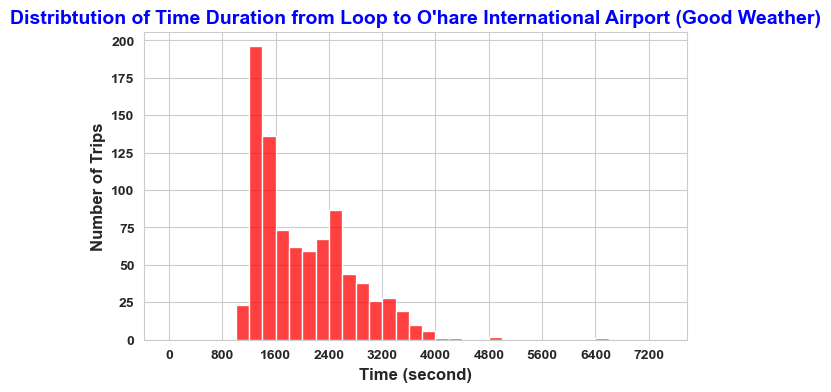

In [43]:
# Plot a histogram to show the distribution of duration_seconds for good weather
sns_histplot(data = good_weather_trip, x = 'duration_seconds', figsize = (7,4),
             title = 'Distribtution of Time Duration from Loop to O\'hare International Airport (Good Weather)',
             xlabel = 'Time (second)', ylabel = 'Number of Trips',
             bins = [x for x in np.arange(0,7500,200)], 
             xticks_label = [x for x in np.arange(0,7500,800)])

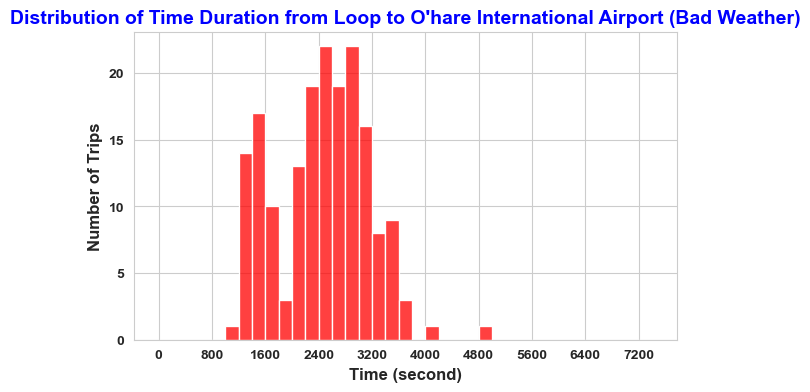

In [44]:
# Plot a histogram to show the distribution of duration_seconds for bad weather
sns_histplot(data = bad_weather_trip, x = 'duration_seconds', figsize = (7,4),
             title = 'Distribution of Time Duration from Loop to O\'hare International Airport (Bad Weather)',
             xlabel = 'Time (second)', ylabel = 'Number of Trips',
             bins = [x for x in np.arange(0,7500,200)],
             xticks_label = [x for x in np.arange(0,7500,800)])

The distributions of data of the two samples are not perfectly normal, some values between 1200 to 1800 distort the distribution. However, with a large sample size of more than 30, by utilising central limit theorem, the sample mean distribution tends to be normal and t-test can be applied.

In [45]:
# Test if the two variances are different
# Take a significance level of 0.01
st.levene(good_weather_trip['duration_seconds'],
          bad_weather_trip['duration_seconds'],
          center = 'median')

LeveneResult(statistic=0.6374800070586859, pvalue=0.4248043185773904)

The null hypothesis for Lenene's test is that the variances are equal for the two samples. 

**By taking a significance level of 0.05, a p-value of 0.6374 is higher than the signficance level, we failed to reject the null hypothesis and we assume that the variances are equal.**

In [46]:
# Conduct t test to test if the means differ
alpha = 0.05

result = st.ttest_ind(good_weather_trip['duration_seconds'],
                      bad_weather_trip['duration_seconds'])

print('p_value:', result.pvalue)

if result.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to to reject the null hypothesis.')

p_value: 1.3603319763146637e-12
We reject the null hypothesis.


**Since the p-value of 1.36e-12 is lower than the significance level of 0.05, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the durations of rides during the good weather and the bad weather are significantly different.**

## 6. General Conclusion <a id='general_conclusion'></a>
**Data Exploration**

By using the available online weather information and the company database, the dataset are sufficient to conduct the relevant analysis and test the hypotheses. However, there are several issues needed to be adrresed:

- The data type of `start_ts` is incorrect.
- There are 197 duplicated rows and anomalies in `trip_data`.

**Data Cleaning**
- The data type of `start_ts` was changed to `datetime`.
- The 197 duplicated rows are not duplicates.
- The anomalies of `0` in `duration_seconds` were dropped.

**Exploratory Analysis**

Some valuable findings are:
- The top 10 companies account for 72.3% of the total number of trips. The top company is 'Flash Cab'.
- The top 10 neighbourhoods accounted for 76.7% of daily trips. The top four neighbourhoods are 'Loop', 'River North', 'Streeterville' and 'West Loop'.
- The number of trips do not show a particular pattern on Saturdays.

**Hypothesis testing**

Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

Significance level: \$\alpha \= 0.05$

After conducting the statistical test - two-sample independent t-test, we have the following result:

**Since the p-value of 1.36e-12 is lower than the significance level of 0.05, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the durations of rides during the good weather and the bad weather are significantly different.**

[Back to Contents](#back)